# importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# installing the apriori library

In [2]:
!pip install apyori # as there is npo such apriori algorithm in sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=a6f1a175ab1800ef950a9f36237b4c545f480da214773f13ea4aedc4cd7f1318
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [3]:
from apyori import apriori

#importing the dataset

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
# no null values can be concluded from the info
# date and itemDescription is object

In [9]:
df.shape

(38765, 3)

In [11]:
df.size # total no of elements in the particular dataframe(38765 x 3)

116295

In [12]:
df.ndim # row and column

2

In [13]:
df.isna()

,Member_number,Date,itemDescription
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
38760,False,False,False
38761,False,False,False
38762,False,False,False
38763,False,False,False


In [14]:
df.isnull().sum()# we can conclude no null values

,0
Member_number,0
Date,0
itemDescription,0


In [15]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
#Q1) Find which of the item is top selling item
max(df.itemDescription.value_counts())
# WHOLE MILK IS MOST SELLING ITEM


2502

In [19]:
#Q2) which of the item is least selling item
min(df.itemDescription.value_counts())
#kitchen utensil,preservation products	are least selling items


1

In [20]:
df.itemDescription.value_counts()


,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
...,...
rubbing alcohol,5
bags,4
baby cosmetics,3


In [21]:
# get top 10 selling items in descending order



,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


<Axes: xlabel='itemDescription'>

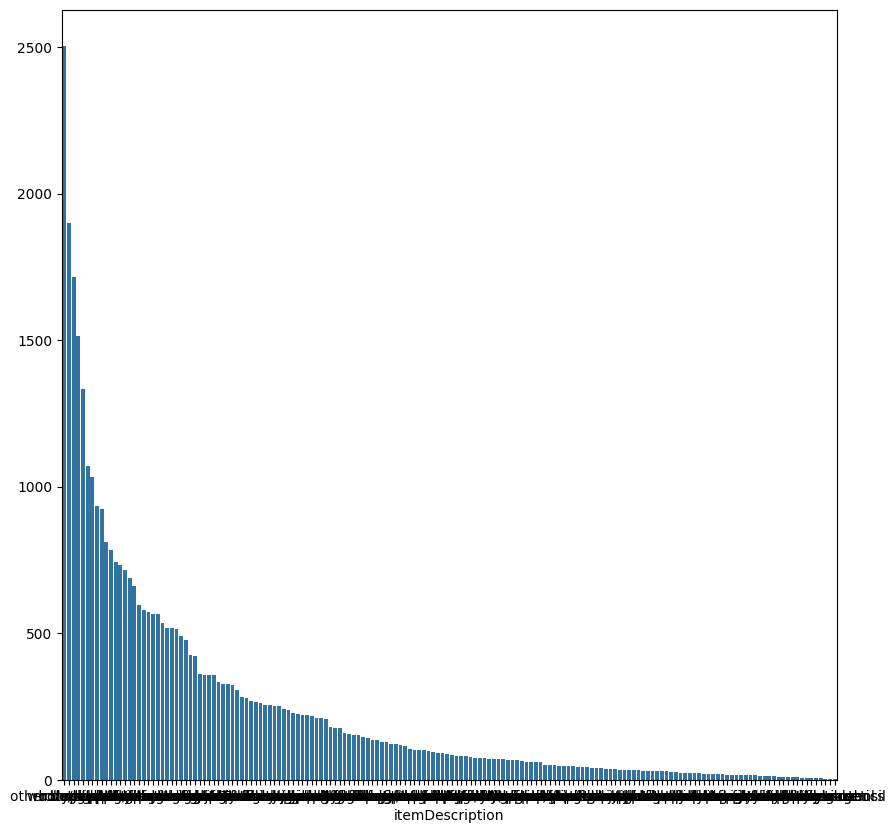

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.itemDescription.value_counts()[:-1].index,y=df.itemDescription.value_counts()[:-1].values)
#

Text(0.5, 1.0, 'Top 10 Selling Items')

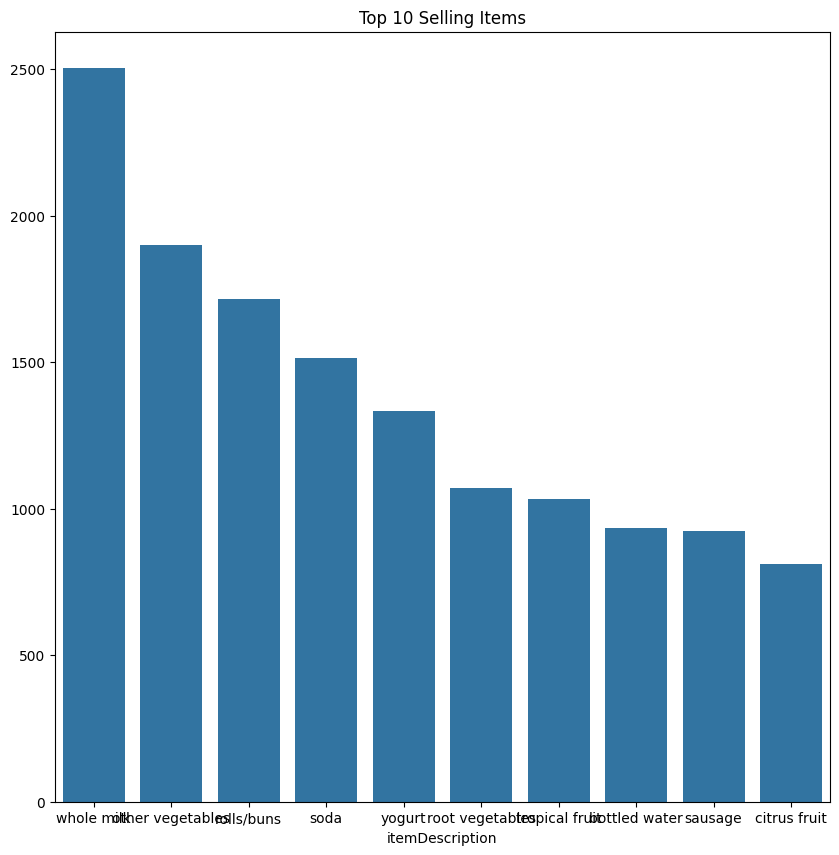

In [30]:
# from the graph below we can conclude that whole milk is most selling and
plt.figure(figsize=(10,10))
sns.barplot(x=df.itemDescription.value_counts()[:10].index,y=df.itemDescription.value_counts()[:10].values)
plt.title('Top 10 Selling Items')


In [31]:
# TOP 10 CUSTOMERS ,who tries to buy things frequently
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [32]:
df.Member_number.value_counts()[:10]

,count
Member_number,
3180,36
3737,33
3050,33
2051,33
2625,31
3915,31
2433,31
2271,31
3872,30


In [ ]:
# we can conclude that member of 3180 id purchases things more frequently and WE CAN ATTRACT THAT PERSON WITH DISCOUNTS AND OFFERS

In [33]:
df.Member_number.value_counts()

,count
Member_number,
3180,36
3737,33
3050,33
2051,33
2625,31
...,...
2503,2
3301,2
1775,2


Text(0.5, 1.0, 'Top 10 Customers')

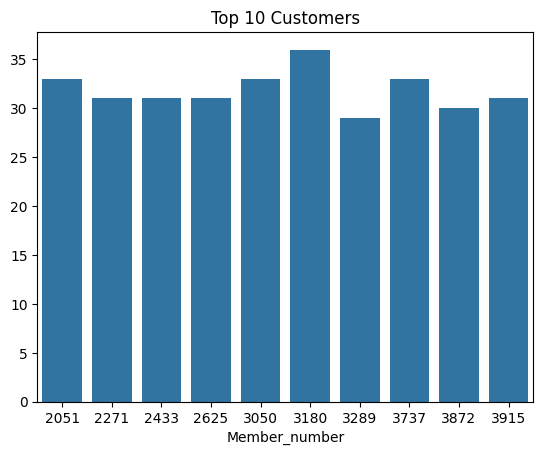

In [34]:
sns.barplot(x=df.Member_number.value_counts()[:10].index,y=df.Member_number.value_counts()[:10].values)
plt.title('Top 10 Customers')

In [35]:
# we can conclude that member of 3180 id purchases things more frequently and WE CAN ATTRACT THAT PERSON WITH DISCOUNTS AND OFFERS,it had REPRESNTED ABOVE IN THE GRAPH


In [37]:
# in which year the majority of the transcation  has been done
df.head()
df.Date.value_counts()

,count
Date,
21-01-2015,96
21-07-2015,93
29-11-2015,92
08-08-2015,92
30-04-2015,91
...,...
29-06-2014,26
04-07-2014,24
16-03-2015,23


In [45]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

In [46]:
df.head()

,Member_number,Date,itemDescription,month,year,date_only,day
0,1808,2015-07-21,tropical fruit,7,2015,2015-07-21,21
1,2552,2015-01-05,whole milk,1,2015,2015-01-05,5
2,2300,2015-09-19,pip fruit,9,2015,2015-09-19,19
3,1187,2015-12-12,other vegetables,12,2015,2015-12-12,12
4,3037,2015-02-01,whole milk,2,2015,2015-02-01,1


In [47]:
df.drop('date_only',axis=1,inplace=True)

In [48]:
df.head()

,Member_number,Date,itemDescription,month,year,day
0,1808,2015-07-21,tropical fruit,7,2015,21
1,2552,2015-01-05,whole milk,1,2015,5
2,2300,2015-09-19,pip fruit,9,2015,19
3,1187,2015-12-12,other vegetables,12,2015,12
4,3037,2015-02-01,whole milk,2,2015,1


In [49]:
df.year.value_counts()

,count
year,
2015,20488
2014,18277


In [50]:
# BY THIS WE CAN CONCLUDE THAT THERE ARE ONLY 2 YEARS I.E 2014,2015 SO 2015 IS THE YEAR OF MORE PURCHASALS
df.month.value_counts()

,count
month,
8,3496
5,3408
1,3324
7,3300
6,3264
10,3261
4,3260
11,3254
3,3133


In [52]:
# AUGUST MONTH HAS HIGH PURCHASALS
df.Date.value_counts()

,count
Date,
2015-01-21,96
2015-07-21,93
2015-11-29,92
2015-08-08,92
2015-04-30,91
...,...
2014-06-29,26
2014-07-04,24
2015-03-16,23


In [53]:
# find out which month in 2015 has higher purchasals
df.head()
df[df.year==2015].month.value_counts()
# WE CAN CONCLUDE THAT AUG MONTH IN 2015 HAS HIGHER PURCHASALS

,count
month,
8,1921
1,1797
5,1793
11,1785
7,1724
3,1722
4,1699
6,1694
10,1670


In [54]:
df[df.year==2015]

,Member_number,Date,itemDescription,month,year,day
0,1808,2015-07-21,tropical fruit,7,2015,21
1,2552,2015-01-05,whole milk,1,2015,5
2,2300,2015-09-19,pip fruit,9,2015,19
3,1187,2015-12-12,other vegetables,12,2015,12
4,3037,2015-02-01,whole milk,2,2015,1
...,...,...,...,...,...,...
37114,1185,2015-08-24,chocolate,8,2015,24
37115,4656,2015-12-25,newspapers,12,2015,25
37116,2741,2015-09-11,canned vegetables,9,2015,11
37117,2654,2015-08-17,coffee,8,2015,17


In [55]:
df[df.year==2015].Date.value_counts()
# on 21st jan 2015 more purchasals took place

,count
Date,
2015-01-21,96
2015-07-21,93
2015-11-29,92
2015-08-08,92
2015-04-30,91
...,...
2015-12-21,29
2015-11-05,29
2015-03-16,23


Apriori Algorithm

In [62]:
data=df.copy()


In [63]:
# Check if 'itemDescription' is in the columns of your DataFrame
print(data.columns)



Index(['Member_number', 'Date', 'itemDescription', 'month', 'year', 'day'], dtype='object')


In [64]:
data.head()

,Member_number,Date,itemDescription,month,year,day
0,1808,2015-07-21,tropical fruit,7,2015,21
1,2552,2015-01-05,whole milk,1,2015,5
2,2300,2015-09-19,pip fruit,9,2015,19
3,1187,2015-12-12,other vegetables,12,2015,12
4,3037,2015-02-01,whole milk,2,2015,1


In [67]:
data=pd.get_dummies(data,columns=['itemDescription'])

In [68]:
data.head()

,Member_number,Date,month,year,day,itemDescription_Instant food products,itemDescription_UHT-milk,itemDescription_abrasive cleaner,itemDescription_artif. sweetener,itemDescription_baby cosmetics,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,2015-07-21,7,2015,21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,2015-01-05,1,2015,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,2015-09-19,9,2015,19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,2015-12-12,12,2015,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,2015-02-01,2,2015,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [69]:
data.columns

Index(['Member_number', 'Date', 'month', 'year', 'day',
       'itemDescription_Instant food products', 'itemDescription_UHT-milk',
       'itemDescription_abrasive cleaner', 'itemDescription_artif. sweetener',
       'itemDescription_baby cosmetics',
       ...
       'itemDescription_turkey', 'itemDescription_vinegar',
       'itemDescription_waffles', 'itemDescription_whipped/sour cream',
       'itemDescription_whisky', 'itemDescription_white bread',
       'itemDescription_white wine', 'itemDescription_whole milk',
       'itemDescription_yogurt', 'itemDescription_zwieback'],
      dtype='object', length=172)

In [71]:
products=df['itemDescription'].unique()

In [72]:
data1=data.groupby(['Member_number','Date'])[products[:]].sum()

KeyError: "Columns not found: 'frozen meals', 'long life bakery product', 'curd', 'frozen vegetables', 'flower (seeds)', 'photo/film', 'baking powder', 'flower soil/fertilizer', 'soft cheese', 'cookware', 'finished products', 'canned beer', 'bathroom cleaner', 'nuts/prunes', 'bottled beer', 'sausage', 'rum', 'turkey', 'tea', 'mayonnaise', 'chocolate', 'tropical fruit', 'bags', 'rice', 'roll products ', 'cocoa drinks', 'specialty chocolate', 'pet care', 'frozen dessert', 'softener', 'ketchup', 'instant coffee', 'dog food', 'rubbing alcohol', 'curd cheese', 'domestic eggs', 'whipped/sour cream', 'candy', 'salt', 'dessert', 'onions', 'preservation products', 'hamburger meat', 'liver loaf', 'specialty cheese', 'flour', 'coffee', 'ham', 'brown bread', 'pip fruit', 'soap', 'tidbits', 'honey', 'waffles', 'butter', 'syrup', 'yogurt', 'frozen fish', 'ice cream', 'salad dressing', 'decalcifier', 'herbs', 'jam', 'abrasive cleaner', 'chocolate marshmallow', 'grapes', 'snack products', 'Instant food products', 'misc. beverages', 'dish cleaner', 'specialty vegetables', 'whole milk', 'white bread', 'fish', 'canned fish', 'sauces', 'packaged fruit/vegetables', 'condensed milk', 'pudding powder', 'liquor (appetizer)', 'sliced cheese', 'artif. sweetener', 'detergent', 'male cosmetics', 'white wine', 'kitchen towels', 'processed cheese', 'soups', 'cake bar', 'hair spray', 'baby cosmetics', 'liquor', 'spread cheese', 'hygiene articles', 'canned fruit', 'red/blush wine', 'butter milk', 'frozen chicken', 'soda', 'prosecco', 'newspapers', 'shopping bags', 'pot plants', 'meat', 'make up remover', 'cling film/bags', 'cereals', 'fruit/vegetable juice', 'brandy', 'pork', 'frozen fruits', 'skin care', 'UHT-milk', 'cream cheese ', 'toilet cleaner', 'nut snack', 'citrus fruit', 'semi-finished bread', 'other vegetables', 'margarine', 'bottled water', 'oil', 'sweet spreads', 'napkins', 'organic sausage', 'root vegetables', 'chicken', 'dishes', 'pasta', 'chewing gum', 'rolls/buns', 'beverages', 'cream', 'frozen potato products', 'light bulbs', 'cat food', 'seasonal products', 'beef', 'sparkling wine', 'ready soups', 'pastry', 'female sanitary products', 'candles', 'house keeping products', 'kitchen utensil', 'salty snack', 'zwieback', 'specialty fat', 'mustard', 'spices', 'dental care', 'specialty bar', 'whisky', 'potato products', 'meat spreads', 'cooking chocolate', 'frankfurter', 'berries', 'liqueur', 'hard cheese', 'pickled vegetables', 'vinegar', 'organic products', 'canned vegetables', 'sugar', 'popcorn', 'cleaner'"

In [73]:
# Get the dummy column names that correspond to your original products.
product_cols = [f'itemDescription_{product}' for product in products]

# Group by 'Member_number' and 'Date' and sum the dummy columns.
data1 = data.groupby(['Member_number', 'Date'])[product_cols].sum()

In [74]:
data1

itemDescription_tropical fruit  \
Member_number Date                                         
1000          2014-06-24                               0   
              2015-03-15                               0   
              2015-05-27                               0   
              2015-07-24                               0   
              2015-11-25                               0   
...                                                  ...   
4999          2015-05-16                               0   
              2015-12-26                               0   
5000          2014-03-09                               0   
              2014-11-16                               0   
              2015-02-10                               0   

                          itemDescription_whole milk  \
Member_number Date                                     
1000          2014-06-24                           1   
              2015-03-15                           1   
              2015-05-27                           0   
              2015-07-24                           0   
              2015-11-25                           0   
...                                              ...   
4999          2015-05-16                           0   
              2015-12-26                           0   
5000          2014-03-09                           0   
              2014-11-16                           0   
              2015-02-10                           0   

                          itemDescription_pip fruit  \
Member_number Date                                    
1000          2014-06-24                          0   
              2015-03-15                          0   
              2015-05-27                          0   
              2015-07-24                          0   
              2015-11-25                          0   
...                                             ...   
4999          2015-05-16                          0   
              2015-12-26                          0   
5000          2014-03-09                          0   
              2014-11-16                          0   
              2015-02-10                          0   

                          itemDescription_other vegetables  \
Member_number Date                                           
1000          2014-06-24                                 0   
              2015-03-15                                 0   
              2015-05-27                                 0   
              2015-07-24                                 0   
              2015-11-25                                 0   
...                                                    ...   
4999          2015-05-16                                 0   
              2015-12-26                                 0   
5000          2014-03-09                                 0   
              2014-11-16                                 1   
              2015-02-10                                 0   

                          itemDescription_rolls/buns  \
Member_number Date                                     
1000          2014-06-24                           0   
              2015-03-15                           0   
              2015-05-27                           0   
              2015-07-24                           0   
              2015-11-25                           0   
...                                              ...   
4999          2015-05-16                           0   
              2015-12-26                           0   
5000          2014-03-09                           0   
              2014-11-16                           0   
              2015-02-10                           0   

                          itemDescription_pot plants  \
Member_number Date                                     
1000          2014-06-24                           0   
              2015-03-15                           0   
              2015-05-27                

In [77]:
data2 = data1.reset_index()[product_cols]

In [78]:
data2.head()

,itemDescription_tropical fruit,itemDescription_whole milk,itemDescription_pip fruit,itemDescription_other vegetables,itemDescription_rolls/buns,itemDescription_pot plants,itemDescription_citrus fruit,itemDescription_beef,itemDescription_frankfurter,itemDescription_chicken,...,itemDescription_flower (seeds),itemDescription_rice,itemDescription_tea,itemDescription_salad dressing,itemDescription_specialty vegetables,itemDescription_pudding powder,itemDescription_ready soups,itemDescription_make up remover,itemDescription_toilet cleaner,itemDescription_preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
def func(data):
  # Iterate through the intersection of products and data.columns:
  for i in product_cols:
    #Only process columns that are both in 'products' and 'data2' columns
    if i in data.index:
      if data[i]>0:
          data[i]=i
  return data


In [80]:
data.head()

,Member_number,Date,month,year,day,itemDescription_Instant food products,itemDescription_UHT-milk,itemDescription_abrasive cleaner,itemDescription_artif. sweetener,itemDescription_baby cosmetics,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,2015-07-21,7,2015,21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,2015-01-05,1,2015,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,2015-09-19,9,2015,19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,2015-12-12,12,2015,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,2015-02-01,2,2015,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [88]:
data2=data2.apply(func,axis=1)

<ipython-input-87-01e8ad04a55c>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'itemDescription_whole milk' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
<ipython-input-87-01e8ad04a55c>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'itemDescription_soda' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
<ipython-input-87-01e8ad04a55c>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'itemDescription_canned beer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
<ipython-input-87-01e8ad04a55c>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a f

In [89]:
data2.head()

,itemDescription_tropical fruit,itemDescription_whole milk,itemDescription_pip fruit,itemDescription_other vegetables,itemDescription_rolls/buns,itemDescription_pot plants,itemDescription_citrus fruit,itemDescription_beef,itemDescription_frankfurter,itemDescription_chicken,...,itemDescription_flower (seeds),itemDescription_rice,itemDescription_tea,itemDescription_salad dressing,itemDescription_specialty vegetables,itemDescription_pudding powder,itemDescription_ready soups,itemDescription_make up remover,itemDescription_toilet cleaner,itemDescription_preservation products
0,0,itemDescription_whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,itemDescription_whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
newdata=data2.values


In [93]:
newdata

array([[0, 'itemDescription_whole milk', 0, ..., 0, 0, 0],
       [0, 'itemDescription_whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [94]:
for i in newdata:
  if i[i!=0].tolist():
    print(i[i!=0].tolist())

Streaming output truncated to the last 5000 lines.
['itemDescription_white wine', 'itemDescription_salty snack']
['itemDescription_other vegetables', 'itemDescription_whipped/sour cream', 'itemDescription_honey']
['itemDescription_sausage', 'itemDescription_canned beer', 'itemDescription_kitchen towels']
['itemDescription_pet care', 'itemDescription_mayonnaise']
['itemDescription_tropical fruit', 'itemDescription_citrus fruit', 'itemDescription_canned fish']
['itemDescription_rolls/buns', 'itemDescription_pastry']
['itemDescription_turkey', 'itemDescription_domestic eggs']
['itemDescription_frankfurter', 'itemDescription_sausage', 'itemDescription_soda', 'itemDescription_napkins']
['itemDescription_specialty bar', 'itemDescription_curd']
['itemDescription_yogurt', 'itemDescription_newspapers']
['itemDescription_pasta', 'itemDescription_hygiene articles']
['itemDescription_rolls/buns', 'itemDescription_salty snack']
['itemDescription_other vegetables', 'itemDescription_rolls/buns', 'ite

In [95]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]


In [96]:
newdata[:10]

[['itemDescription_whole milk',
  'itemDescription_pastry',
  'itemDescription_salty snack'],
 ['itemDescription_whole milk',
  'itemDescription_yogurt',
  'itemDescription_sausage',
  'itemDescription_semi-finished bread'],
 ['itemDescription_soda', 'itemDescription_pickled vegetables'],
 ['itemDescription_canned beer', 'itemDescription_misc. beverages'],
 ['itemDescription_sausage', 'itemDescription_hygiene articles'],
 ['itemDescription_whole milk',
  'itemDescription_rolls/buns',
  'itemDescription_sausage'],
 ['itemDescription_whole milk', 'itemDescription_soda'],
 ['itemDescription_frankfurter',
  'itemDescription_soda',
  'itemDescription_whipped/sour cream'],
 ['itemDescription_beef', 'itemDescription_white bread'],
 ['itemDescription_frankfurter', 'itemDescription_curd']]

Apriori Implementation

In [99]:
association=apriori(newdata,min_support=0.0003,min_confidence=0.05,min_lift=3,max_length=2)


In [100]:
result=list(association)

In [101]:
result

[RelationRecord(items=frozenset({'itemDescription_fruit/vegetable juice', 'itemDescription_liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'itemDescription_liver loaf'}), items_add=frozenset({'itemDescription_fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'itemDescription_ham', 'itemDescription_pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'itemDescription_pickled vegetables'}), items_add=frozenset({'itemDescription_ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'itemDescription_roll products ', 'itemDescription_meat'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'itemDescription_roll products '}), items_add=frozenset({'itemDescription_meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 Rela

In [102]:
result[3]

RelationRecord(items=frozenset({'itemDescription_salt', 'itemDescription_misc. beverages'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'itemDescription_salt'}), items_add=frozenset({'itemDescription_misc. beverages'}), confidence=0.05617977528089888, lift=3.5619405827461437)])

In [104]:
for i in result[5]:
  print(i)

frozenset({'itemDescription_soups', 'itemDescription_seasonal products'})
0.0003341575887188398
[OrderedStatistic(items_base=frozenset({'itemDescription_soups'}), items_add=frozenset({'itemDescription_seasonal products'}), confidence=0.10416666666666667, lift=14.704205974842768)]


In [105]:
# itemSet={itemDescription_soups', 'itemDescription_seasonal products'}
# lets make ASSOCIATION RULE: soups-> seasonal products
# if a person buy soups then recommend or provide seasonal products
# confidence=0.10416666666666667

In [107]:
for i in result[6]:
  print(i)

frozenset({'itemDescription_sugar', 'itemDescription_spread cheese'})
0.00040098910646260775
[OrderedStatistic(items_base=frozenset({'itemDescription_spread cheese'}), items_add=frozenset({'itemDescription_sugar'}), confidence=0.06, lift=3.3878490566037733)]
